In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

In [3]:
trip = pd.read_csv('/home/kyohei/bike_share_data/trip_all.csv')

In [29]:
station = pd.read_csv('/home/kyohei/bike_share_data/201608_station_data.csv')

In [30]:
station = station.dropna()
station['station_id'] = station['station_id'].astype(int)

In [45]:
#サンフランシスコに限定
trip_SF_start = trip[trip['Start Terminal'].isin(station[station['landmark']=='San Francisco']['station_id'])]

#datetimeに変換
trip_SF_start['Start Date'] = trip_SF_start['Start Date'].apply(lambda x:pd.to_datetime(x))

#曜日
trip_SF_start['dayofweek'] = trip_SF_start['Start Date'].apply(lambda x:x.dayofweek)

#時間
trip_SF_start['hour'] = trip_SF_start['Start Date'].apply(lambda x:x.hour)


/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [46]:
#サンフランシスコに限定
trip_SF_end = trip[trip['End Terminal'].isin(station[station['landmark']=='San Francisco']['station_id'])]

#datetimeに変換
trip_SF_end['End Date'] = trip_SF_end['End Date'].apply(lambda x:pd.to_datetime(x))

#曜日
trip_SF_end['dayofweek'] = trip_SF_end['End Date'].apply(lambda x:x.dayofweek)

#時間
trip_SF_end['hour'] = trip_SF_end['End Date'].apply(lambda x:x.hour)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [48]:
#平日のAM7-9の出発、到着バランス
start_AM = trip_SF_start[(trip_SF_start['dayofweek']<=4) & (trip_SF_start['hour']>=7) &(trip_SF_start['hour']<=9)]
end_AM = trip_SF_end[(trip_SF_end['dayofweek']<=4) & (trip_SF_end['hour']>=7) &(trip_SF_end['hour']<=9)]

start_count = pd.DataFrame(start_AM.groupby(['Start Terminal','Start Station']).size()).reset_index()
start_count.rename(columns={0:'start_count'},inplace=True)

end_count = pd.DataFrame(end_AM.groupby(['End Terminal','End Station']).size()).reset_index()
end_count.rename(columns={0:'end_count'},inplace=True)

merge_am = start_count.merge(end_count,left_on='Start Terminal',right_on='End Terminal')[['Start Terminal','Start Station','start_count','end_count']]

merge_am['end_count'] = -merge_am['end_count']

merge_am['sum'] = merge_am['start_count'] + merge_am['end_count']

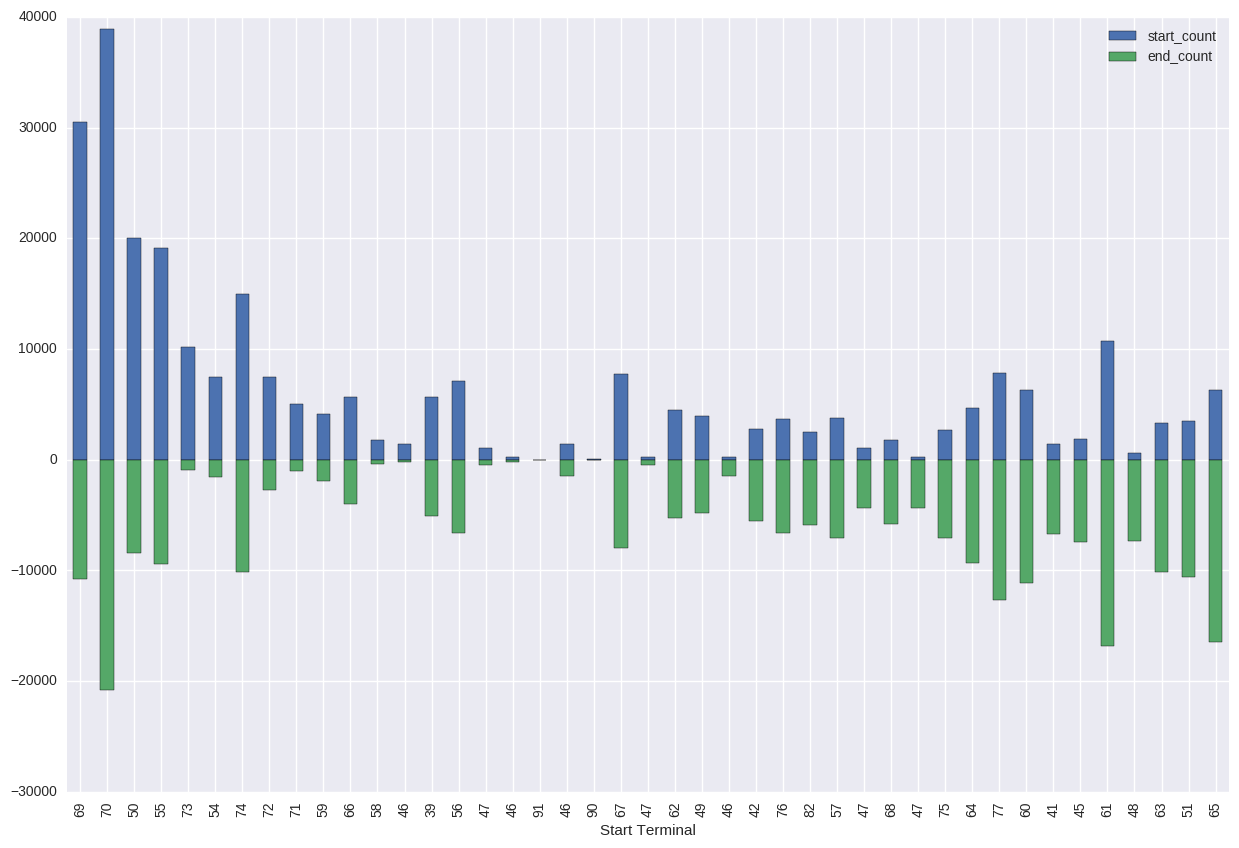

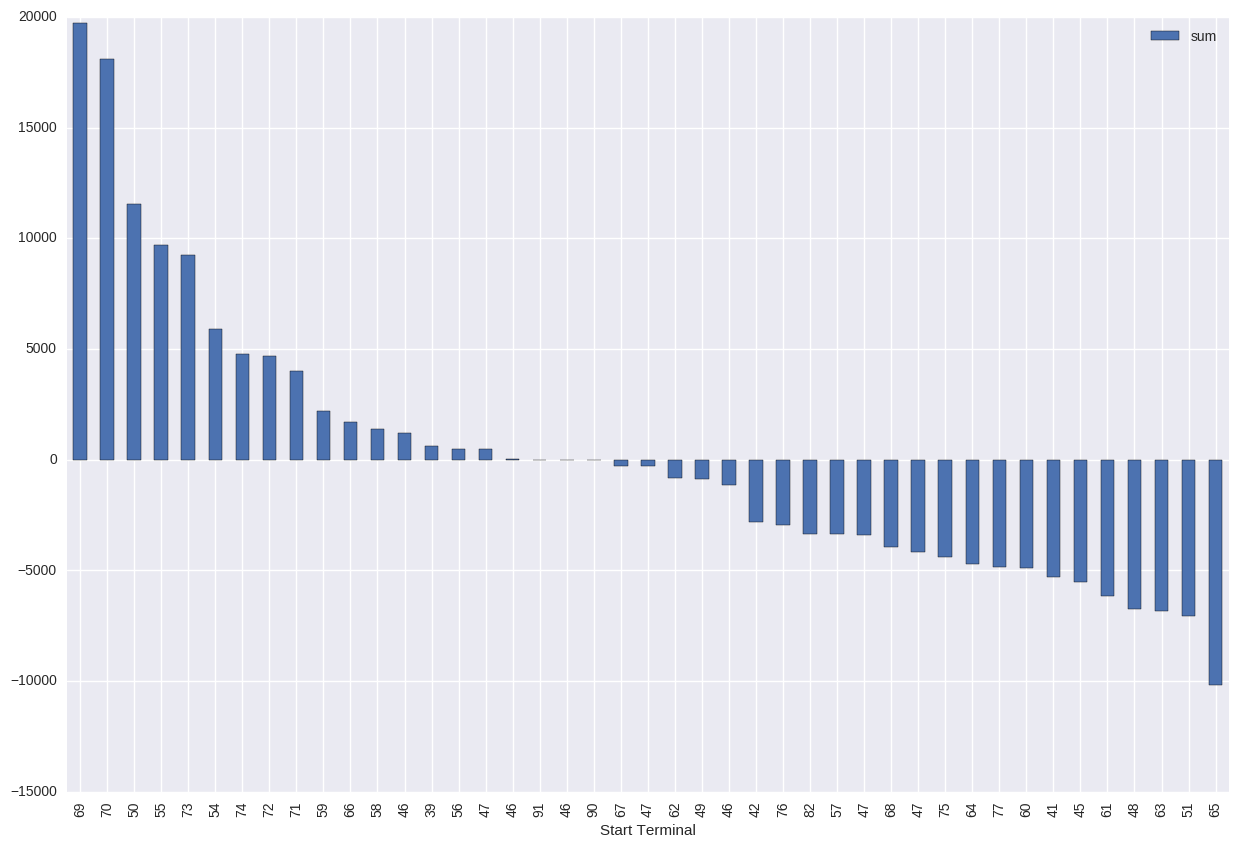

In [56]:
#Terminal AM
merge_am.sort_values('sum',ascending=False).plot('Start Terminal',['start_count','end_count'],stacked=True,kind='bar',figsize=(15,10))
merge_am.sort_values('sum',ascending=False).plot('Start Terminal','sum',kind='bar',figsize=(15,10))

In [57]:
#平日のPM4-6の出発、到着バランス
start_PM = trip_SF_start[(trip_SF_start['dayofweek']<=4) & (trip_SF_start['hour']>=16) &(trip_SF_start['hour']<=18)]
end_PM = trip_SF_end[(trip_SF_end['dayofweek']<=4) & (trip_SF_end['hour']>=16) &(trip_SF_end['hour']<=18)]

start_count = pd.DataFrame(start_PM.groupby(['Start Terminal','Start Station']).size()).reset_index()
start_count.rename(columns={0:'start_count'},inplace=True)

end_count = pd.DataFrame(end_PM.groupby(['End Terminal','End Station']).size()).reset_index()
end_count.rename(columns={0:'end_count'},inplace=True)

merge_am = start_count.merge(end_count,left_on='Start Terminal',right_on='End Terminal')[['Start Terminal','Start Station','start_count','end_count']]

merge_am['end_count'] = -merge_am['end_count']

merge_am['sum'] = merge_am['start_count'] + merge_am['end_count']

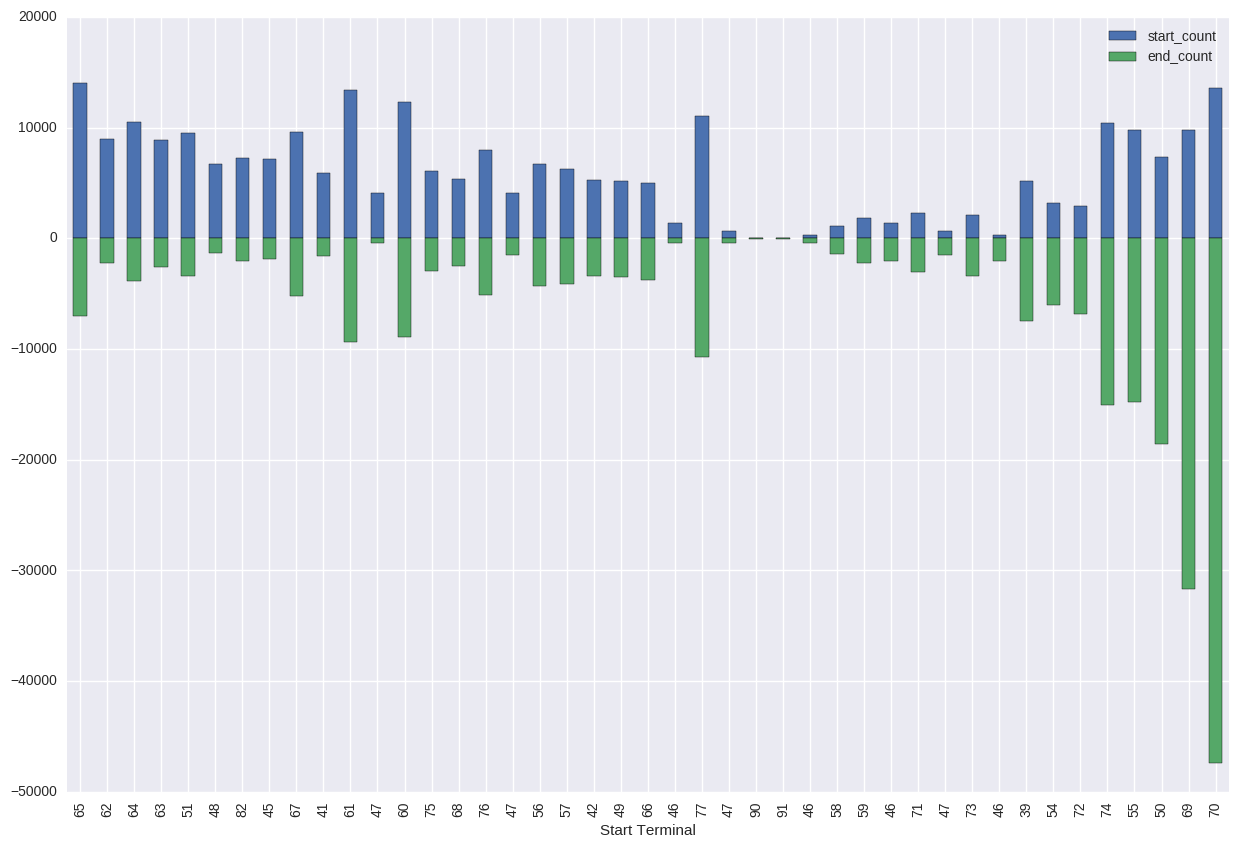

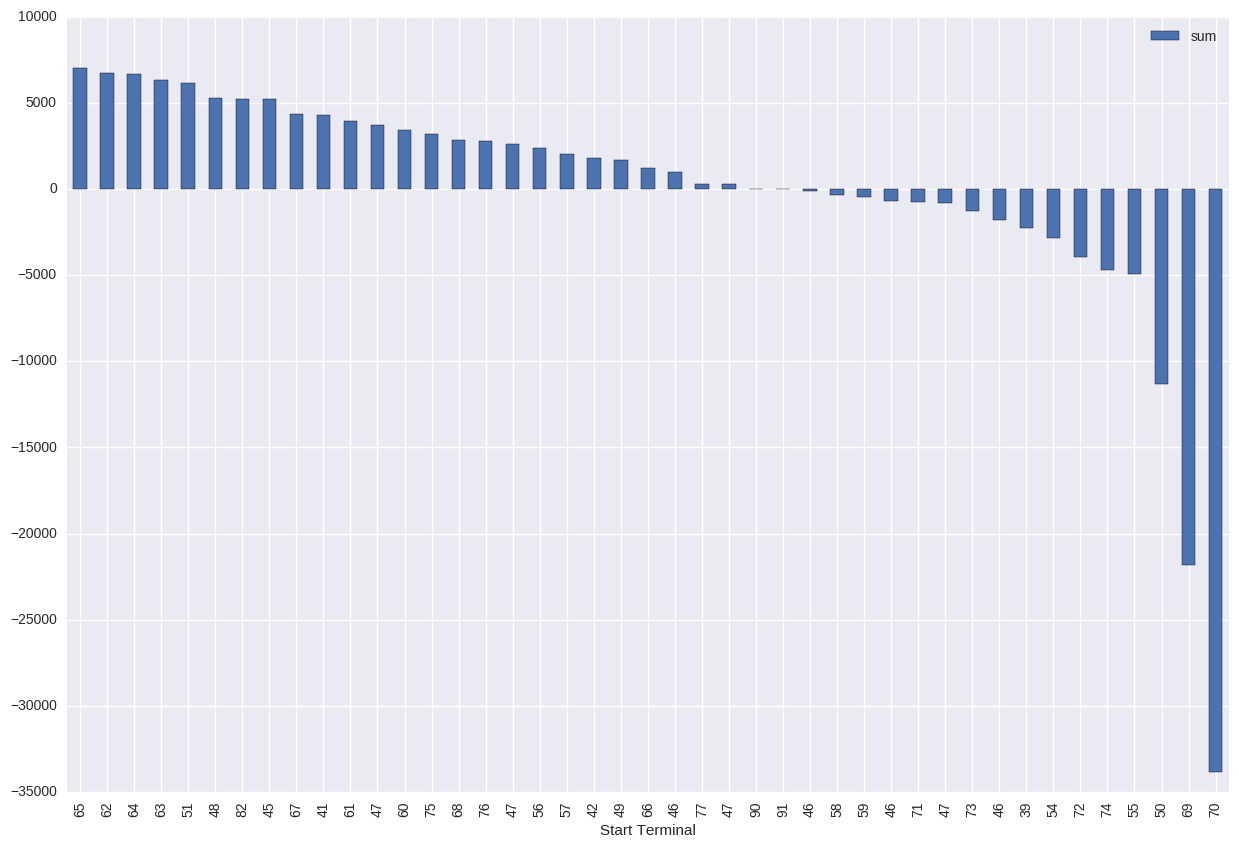

In [60]:
#Terminal PM
merge_am.sort_values('sum',ascending=False).plot('Start Terminal',['start_count','end_count'],stacked=True,kind='bar',figsize=(15,10))
merge_am.sort_values('sum',ascending=False).plot('Start Terminal','sum',kind='bar',figsize=(15,10))